In [2]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [3]:
weather = pd.read_csv("weather.csv")
weather.tail(10)

,reflectance,weight,denomination
169,26.913923,5.611840,2
170,27.800820,5.595559,2
171,28.444039,6.162531,2
172,28.414699,4.792008,2
173,28.869236,5.383916,2
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


<Axes: xlabel='reflectance', ylabel='weight'>

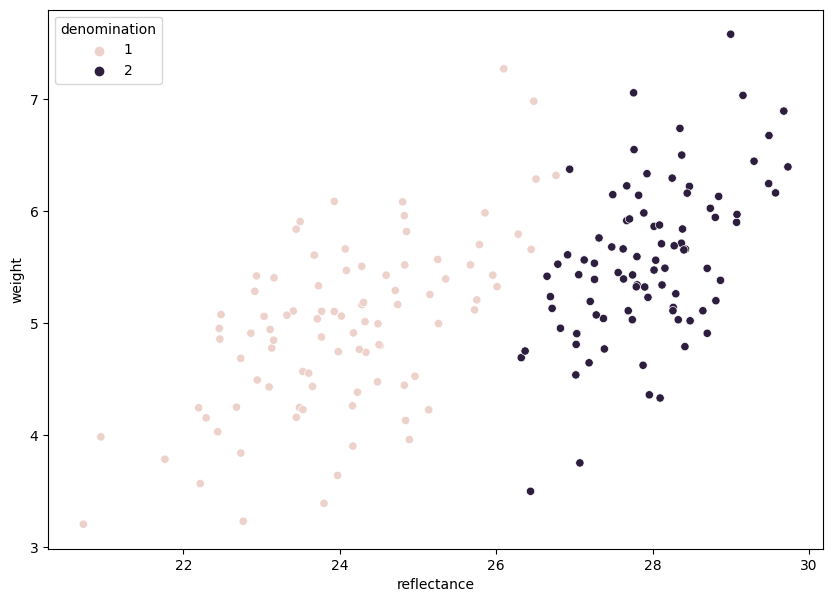

In [4]:
sns.scatterplot(x="humidity",y="pressure",data=weather, hue="clearness")

In [5]:
# test-train split
X = weather[["humidity","pressure"]].to_numpy()
y = weather[["clearness"]].to_numpy() - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [6]:
## Initiate classifier and train it using the X_train data and the y_train labels
## make sure you instantiate your classifier and name it model
model = Sequential()
model.add(Dense(1, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [7]:
## train your model
model.fit(X_train, y_train, epochs=100, batch_size=30)

Epoch 1/1000
5/5 [==============================] - 1s 4ms/step - loss: 0.8654 - accuracy: 0.4965
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.8489 - accuracy: 0.4965
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.8327 - accuracy: 0.4965
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.4965
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.4965
Epoch 6/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7925 - accuracy: 0.4965
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.4965
Epoch 8/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7712 - accuracy: 0.4965
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.7609 - accuracy: 0.4965
Epoch 10/1000
5/5 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.4965
Epoch 11/1000
5/5 [

In [8]:
## test the accuracy of your model
loss,acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.5740 - accuracy: 0.9444


313/313 [==============================] - 0s 1ms/step


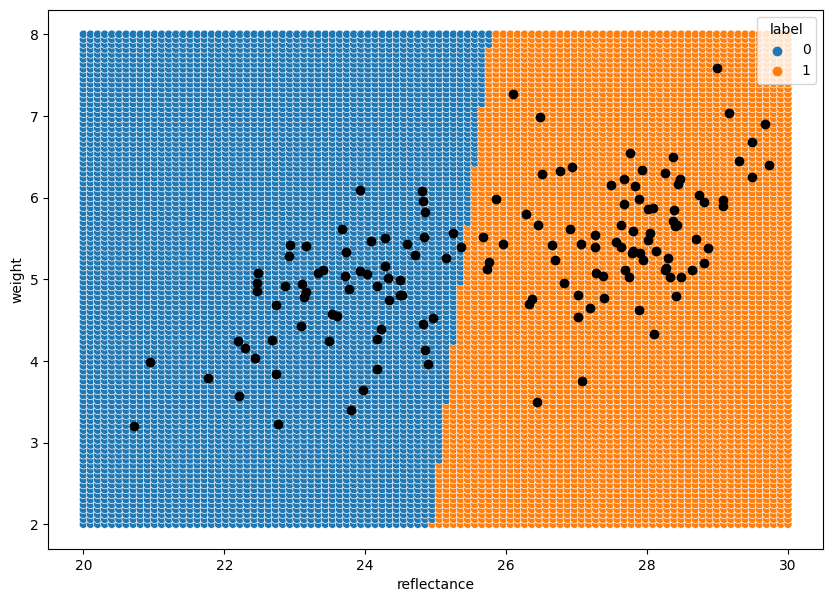

In [9]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example
## Plot the decision boundary
humidity = np.linspace(0,100,100)
pressure = np.linspace(0,100,100)
from itertools import product
randomdata = np.array(list(product(humidity, pressure)))
g = model.predict(randomdata)
db=pd.DataFrame({"humidity":randomdata[:,0],"pressure":randomdata[:,1],"clearness":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="humidity",y="pressure",hue="clearness")
plt.scatter(X_train[:,0],X_train[:,1],color="black")

In [ ]:
## additional stuff you want to add 

In [10]:
# dump your classifier into a pickle file
pickle.dump(model,open("model.pickle",'wb'))

In [11]:
# test pickled file
file = open('model.pickle','rb')
model2 = pickle.load(file)
file.close()

print(model2)
## test the accuracy of your loaded model and compare